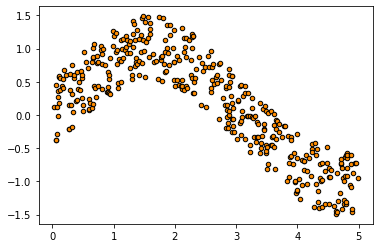

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.sort(5*np.random.rand(400,1),axis=0)
T = np.linspace(0,5,500)[:,np.newaxis]
y = np.sin(x).ravel()

y[::1] += 1 * (0.5 - np.random.rand(400))
plt.scatter(x,y,s=20,edgecolors='black',c = 'darkorange',label='data')

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,train_size=0.7, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(280, 1) (120, 1) (280,) (120,)


In [3]:
rg_1 = DecisionTreeRegressor(max_depth=2)
rg_2 = DecisionTreeRegressor(max_depth=5)

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

y_1 = rg_1.fit(x_train,y_train).predict(x_test)
y_2 = rg_2.fit(x_train,y_train).predict(x_test)

preds = [y_1,y_2]
weights = ['max depth = 2','max depth = 5']
evls = ['mse','rmse','mae']

results = pd.DataFrame(index = weights, columns = evls)
for pred, nm in zip(preds,weights):
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    
    results.loc[nm]['mse'] = round(mse,2)
    results.loc[nm]['rmse'] = round(rmse,2)
    results.loc[nm]['mae'] = round(mae,2)
    
    
results

,mse,rmse,mae
max depth = 2,0.12,0.35,0.29
max depth = 5,0.12,0.35,0.3


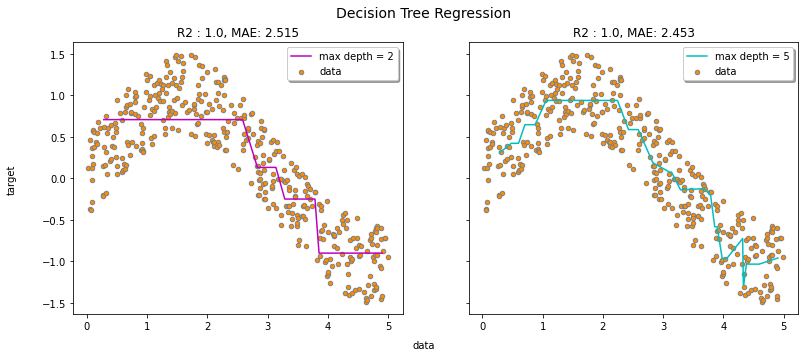

In [7]:
x_test = np.sort(5*np.random.rand(40,1),axis=0)

regrs = [rg_1,rg_2]
depths = ['max depth = 2','max depth = 5']
model_color = ['m','c']

fig,axes = plt.subplots(nrows=1, ncols =2, sharey=True, figsize = (13,5))

for ix, regr in enumerate(regrs):
    pred = regr.fit(x,y).predict(x_test)
    r2 = regr.score(x_test,pred)
    mae = mean_absolute_error(x_test,pred)
    
    axes[ix].plot(x_test,pred,
                  color = model_color[ix],
                  label = "{}".format(depths[ix]))
    
    axes[ix].scatter(x,y,s=20,
                  edgecolor='gray',
                  c='darkorange',
                  label='data')
    axes[ix].legend(loc='upper right',
                    ncol=1,
                    fancybox=True,
                    shadow=True)
    
    axes[ix].set_title('R2 : {r}, MAE: {m}'.format(r=round(r2,3),m=round(mae,3))) 
    
    
fig.text(0.5, 0.04,'data',ha = 'center', va = 'center')
fig.text(0.06, 0.5, 'target', ha = 'center', va = 'center',rotation = 'vertical')  
plt.suptitle('Decision Tree Regression', fontsize=14)
plt.show()